We will be covering the following topics for Lab 1:
- Warmup for Python, spacy, and nltk.
- Vector Space Model
- Bag of Word 

Data (*reviews_0_40.csv*) can be downloaded from [here](https://drive.google.com/drive/folders/187DY4loG1z6phS04oO6fY74j_yXm8WJF?usp=sharing)

Mount your Google drive. 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Data Analysis

In [6]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/data_text/reviews_0_40.csv') # Path will be different for you.

In [7]:
df.shape

(41, 5)

In [8]:
df.head()

,Unnamed: 0,movieId,imdbId,tmdbId,reviews
0,0,1,114709,862.0,"[""Andy's toys live a reasonable life of fun an..."
1,1,2,113497,8844.0,"[""Among the thousands of films I have viewed, ..."
2,2,3,113228,15602.0,['Sequels are rarely half as good as the origi...
3,3,4,114885,31357.0,"[""This was a good movie, even though I'm not t..."
4,4,5,113041,11862.0,"[""As much as I want to rag this movie, make fu..."


In [9]:
df.columns

Index(['Unnamed: 0', 'movieId', 'imdbId', 'tmdbId', 'reviews'], dtype='object')

In [10]:
print(df['reviews'][0])

["Andy's toys live a reasonable life of fun and peace, their only worries are birthdays and Christmases, when new toys could easily replace those already there.  One such birthday Andy's top toy, Woody the cowboy, finds himself in direct competition with Andy's new Buzz Lightyear doll.  When rivalries boil over Woody tries to hide Buzz down the side of the bed but accidentally pushes him out the window, the other tops expel Woody, and he leaves with no choice but to find Buzz and return him to the house.  But with only two days before Andy moves house, time is of the essence.Given how often the same mix of animation, wit, jokes and kids humour has been used since Toy Story (Ice Age, Monsters Inc, Bugs Life) it is easy to forget how refreshing it was when it first came out.  I have just watched it again and it is dating a little in comparison to more recent twists on the formula.  It seems each one has to be sharper and have more references etc in the background.  However it is still ve

Some preprocessing to understand the text:

In [11]:
from IPython.display import HTML, display

def my_css():
   display(HTML(""""""))

get_ipython().events.register('pre_run_cell', my_css)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import spacy
from spacy import displacy
from sklearn.decomposition import PCA

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [13]:
nlp = spacy.load("en_core_web_sm")

In [14]:
text = df['reviews'].values[0]

In [15]:
text

'["Andy\'s toys live a reasonable life of fun and peace, their only worries are birthdays and Christmases, when new toys could easily replace those already there.  One such birthday Andy\'s top toy, Woody the cowboy, finds himself in direct competition with Andy\'s new Buzz Lightyear doll.  When rivalries boil over Woody tries to hide Buzz down the side of the bed but accidentally pushes him out the window, the other tops expel Woody, and he leaves with no choice but to find Buzz and return him to the house.  But with only two days before Andy moves house, time is of the essence.Given how often the same mix of animation, wit, jokes and kids humour has been used since Toy Story (Ice Age, Monsters Inc, Bugs Life) it is easy to forget how refreshing it was when it first came out.  I have just watched it again and it is dating a little in comparison to more recent twists on the formula.  It seems each one has to be sharper and have more references etc in the background.  However it is stil

In [16]:
len(text)

20815

In [17]:
text.replace('\\', '')

'["Andy\'s toys live a reasonable life of fun and peace, their only worries are birthdays and Christmases, when new toys could easily replace those already there.  One such birthday Andy\'s top toy, Woody the cowboy, finds himself in direct competition with Andy\'s new Buzz Lightyear doll.  When rivalries boil over Woody tries to hide Buzz down the side of the bed but accidentally pushes him out the window, the other tops expel Woody, and he leaves with no choice but to find Buzz and return him to the house.  But with only two days before Andy moves house, time is of the essence.Given how often the same mix of animation, wit, jokes and kids humour has been used since Toy Story (Ice Age, Monsters Inc, Bugs Life) it is easy to forget how refreshing it was when it first came out.  I have just watched it again and it is dating a little in comparison to more recent twists on the formula.  It seems each one has to be sharper and have more references etc in the background.  However it is stil

Sentence Tokenization

In [18]:
doc = nlp(text)
for sent in doc.sents:
    print(">", sent, sent.start, sent.end)

> ["Andy's toys live a reasonable life of fun and peace, their only worries are birthdays and Christmases, when new toys could easily replace those already there.   0 33
> One such birthday Andy's top toy, Woody the cowboy, finds himself in direct competition with Andy's new Buzz Lightyear doll.   33 59
> When rivalries boil over Woody tries to hide Buzz down the side of the bed but accidentally pushes him out the window, the other tops expel Woody, and he leaves with no choice but to find Buzz and return him to the house.   59 106
> But with only two days before Andy moves house, time is of the essence. 106 122
> Given how often the same mix of animation, wit, jokes and kids humour has been used since Toy Story (Ice Age, Monsters Inc, Bugs Life) it is easy to forget how refreshing it was when it first came out.   122 169
> I have just watched it again and it is dating a little in comparison to more recent twists on the formula.   169 192
> It seems each one has to be sharper and have 

Extracting entities

In [19]:
for ent in doc.ents:
    print(ent, ent.label_)

Andy PERSON
Christmases PERSON
One CARDINAL
Andy PERSON
Andy PERSON
Buzz Lightyear FAC
Buzz PERSON
Buzz PERSON
only two days DATE
Andy PERSON
Toy Story ORG
Monsters Inc ORG
Bugs Life ORG
first ORDINAL
first ORDINAL
Buzz and Woody ORG
Buzz PERSON
two CARDINAL
the Potato Head ORG
Woody PERSON
Allen PERSON
Buzz ORG
Varney GPE
Ratzenberger, Ermey ORG
Rickles PERSON
third ORDINAL
Tom Hanks PERSON
Tim Allen PERSON
Jim Varney PERSON
Don Rickles PERSON
Wallace Shawn PERSON
John Ratzenberger PERSON
Hanks ORG
Allen PERSON
Buzz Armstrong PERSON
Potato Head PERSON
Slinky PERSON
Rex PERSON
the Pixar Studios ORG
a decade ago DATE
He\ ORG
hasn\'t ORG
Buzz Lightyear PERSON
Toy Story PERSON
1995 DATE
It\ ORG
Tim Allen PERSON
Buzz PERSON
Tom Hanks PERSON
Buzz PERSON
Sid ORG
every minute TIME
Toy Story WORK_OF_ART
5/5 CARDINAL
one CARDINAL
Disney ORG
first ORDINAL
Tom Hanks).Woody PERSON
Andy PERSON
Andy PERSON
Woody PERSON
Andy PERSON
Andy PERSON
Tim Allen PERSON
Potato Head PERSON
Don Rickles PERSON
Re

In [ ]:
apple_doc = nlp(text) 

for ent in apple_doc.ents:
    print(ent.text, ent.label_)

displacy.render(apple_doc, style="ent", jupyter=True)

Andy PERSON
Christmases PERSON
One CARDINAL
Andy PERSON
Andy PERSON
Buzz Lightyear FAC
Buzz PERSON
Buzz PERSON
only two days DATE
Andy PERSON
Toy Story ORG
Monsters Inc ORG
Bugs Life ORG
first ORDINAL
first ORDINAL
Buzz and Woody ORG
Buzz PERSON
two CARDINAL
the Potato Head ORG
Woody PERSON
Allen PERSON
Buzz ORG
Varney GPE
Ratzenberger, Ermey ORG
Rickles PERSON
third ORDINAL
Tom Hanks PERSON
Tim Allen PERSON
Jim Varney PERSON
Don Rickles PERSON
Wallace Shawn PERSON
John Ratzenberger PERSON
Hanks ORG
Allen PERSON
Buzz Armstrong PERSON
Potato Head PERSON
Slinky PERSON
Rex PERSON
the Pixar Studios ORG
a decade ago DATE
He\ ORG
hasn\'t ORG
Buzz Lightyear PERSON
Toy Story PERSON
1995 DATE
It\ ORG
Tim Allen PERSON
Buzz PERSON
Tom Hanks PERSON
Buzz PERSON
Sid ORG
every minute TIME
Toy Story WORK_OF_ART
5/5 CARDINAL
one CARDINAL
Disney ORG
first ORDINAL
Tom Hanks).Woody PERSON
Andy PERSON
Andy PERSON
Woody PERSON
Andy PERSON
Andy PERSON
Tim Allen PERSON
Potato Head PERSON
Don Rickles PERSON
Re

Lemmatization, POS-Tags, Syntax Trees

In [ ]:
for sent in doc.sents:
    for tok in sent:
        print(tok, tok.lemma_, spacy.explain(tok.pos_), tok.is_stop)
    break

[ [ other False
" " punctuation False
Andy Andy proper noun False
's 's particle True
toys toy noun False
live live verb False
a a determiner True
reasonable reasonable adjective False
life life noun False
of of adposition True
fun fun noun False
and and coordinating conjunction True
peace peace noun False
, , punctuation False
their their pronoun True
only only adjective True
worries worry noun False
are be auxiliary True
birthdays birthday noun False
and and coordinating conjunction True
Christmases christmas noun False
, , punctuation False
when when subordinating conjunction True
new new adjective False
toys toy noun False
could could auxiliary True
easily easily adverb False
replace replace verb False
those those pronoun True
already already adverb True
there there adverb True
. . punctuation False
    space False


Some of the POS tags

Source: [Treebank tags](https://i.pinimg.com/736x/68/49/b1/6849b1c20873e441bbd80563cdeef70a--natural-language-artificial-intelligence.jpg), [Penn treebank POS](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

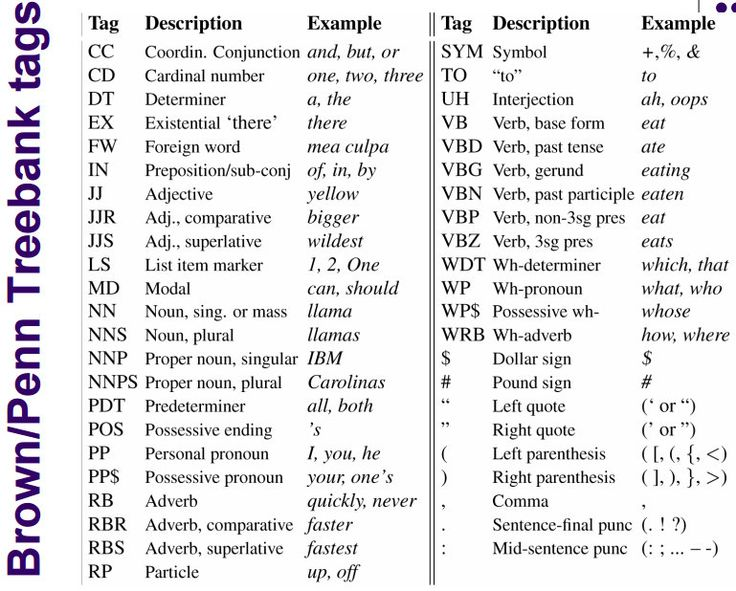

In [ ]:
# FOR THE MORPHOLOGY (DO EXPERIMENT LATER) 
for sent in doc.sents:
    for tok in sent:
        print(tok, tok.morph)
    break

[ 
" PunctSide=Ini|PunctType=Quot
Andy Number=Sing
's 
toys Number=Plur
live Tense=Pres|VerbForm=Fin
a Definite=Ind|PronType=Art
reasonable Degree=Pos
life Number=Sing
of 
fun Number=Sing
and ConjType=Cmp
peace Number=Sing
, PunctType=Comm
their Number=Plur|Person=3|Poss=Yes|PronType=Prs
only Degree=Pos
worries Number=Plur
are Mood=Ind|Tense=Pres|VerbForm=Fin
birthdays Number=Plur
and ConjType=Cmp
Christmases Number=Plur
, PunctType=Comm
when 
new Degree=Pos
toys Number=Plur
could VerbForm=Fin
easily 
replace VerbForm=Inf
those Number=Plur|PronType=Dem
already 
there PronType=Dem
. PunctType=Peri
  


In [ ]:
displacy.render(sent, style='dep', jupyter=True)

After understanding the text, let's divert back and take 20 values from the corpus list




In [ ]:
corpus = df['reviews'].values[0:20] # INITIALLY TAKING ONLY 20 VALUES
len(corpus)

20

In [ ]:
corpus

array(['["Andy\'s toys live a reasonable life of fun and peace, their only worries are birthdays and Christmases, when new toys could easily replace those already there.  One such birthday Andy\'s top toy, Woody the cowboy, finds himself in direct competition with Andy\'s new Buzz Lightyear doll.  When rivalries boil over Woody tries to hide Buzz down the side of the bed but accidentally pushes him out the window, the other tops expel Woody, and he leaves with no choice but to find Buzz and return him to the house.  But with only two days before Andy moves house, time is of the essence.Given how often the same mix of animation, wit, jokes and kids humour has been used since Toy Story (Ice Age, Monsters Inc, Bugs Life) it is easy to forget how refreshing it was when it first came out.  I have just watched it again and it is dating a little in comparison to more recent twists on the formula.  It seems each one has to be sharper and have more references etc in the background.  However it 

### 1. Vector space model


1. TF: The ratio of count of a term (word) in a document d by the total number of words in that respective document.

```tf(t,d) = count of t in document / number of words in document```

2. IDF is the number of documents in which the word is present.

```df(t) = occurrence of t in N documents of corpus```

```idf(t) = log(N documents of corpus/(df + 1))```


All in all, the final TF-IDF is defined as

```tf-idf(t, d) = tf(t, d) * log(N/(df + 1))```
<br>
<br>
<br>
Reference: William Scott, [Medium article](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:

print(vectorizer.get_feature_names()) # RETURNS A LIST OF FEATURES
#['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.shape)
     

['000', '006', '007', '10', '100', '11', '13', '15', '1668while', '17', '17th', '18', '1800', '1890s', '1893', '1920s', '1925', '1940', '195', '1950', '1950s', '1951', '1954', '1960', '1960s', '1962', '1963', '1964', '1968', '1969', '1970', '1973', '1974', '1977', '1982', '1985', '1989', '1990', '1990s', '1991', '1992', '1994', '1995', '1996', '1997', '19th', '20', '200', '2005', '2010', '2014', '2017', '2021', '20th', '21st', '24', '25', '250', '26', '2nd', '2xs', '30', '34', '37th', '40', '400', '42', '44', '45', '50', '500', '60', '64', '65mm', '70', '733', '80', '81', '90', '90s', '92', '95', '99', 'aaron', 'abandon', 'abandoned', 'abandoning', 'abbey', 'abhorrent', 'abilities', 'ability', 'able', 'ably', 'aborted', 'about', 'above', 'abraham', 'absolute', 'absolutely', 'absorbed', 'absurd', 'absurdity', 'abundance', 'abuse', 'abut', 'abyss', 'accents', 'accept', 'acceptable', 'accepted', 'accepting', 'accepts', 'access', 'accident', 'accidentally', 'accidents', 'acclaimed', 'accom

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Vector Space representation
import pandas as pd
vector = X
df1 = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
df1

,000,006,007,10,100,11,13,15,1668while,17,...,yulin,z3,zarathustran,zeal,zero,zinger,zone,zoom,zurg,éric
0,0.000000,0.000000,0.000000,0.009113,0.006349,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.008004,0.000000,0.008004,0.000000,0.000000,0.00000,0.016009,0.000000
1,0.000000,0.000000,0.000000,0.016464,0.008602,0.000000,0.017204,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009968,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.014176,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018676,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.032761,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.008661,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01141,0.000000,0.000000
8,0.020199,0.000000,0.000000,0.013082,0.000000,0.000000,0.000000,0.000000,0.000000,0.01149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.027589,0.075871,0.007853,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.006897,0.000000,0.006897,0.000000,0.000000,0.000000,0.00000,0.000000,0.013795


In [ ]:
#loading basic packages
import nltk

nltk.download('punkt')
nltk.download('stopwords')
     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# this function returns a list of tokenized and stemmed words of any text
def get_tokenized_list(doc_text):
    tokens = nltk.word_tokenize(doc_text)
    return tokens

# This function will performing stemming on tokenized words
def word_stemmer(token_list):
  ps = nltk.stem.PorterStemmer()
  stemmed = []
  for words in token_list:
    stemmed.append(ps.stem(words))
  return stemmed

In [ ]:

# Function to remove stopwords from tokenized word list
def remove_stopwords(doc_text):
  cleaned_text = []
  for words in doc_text:
    if words not in stop_words:
      cleaned_text.append(words)
  return cleaned_text
     

In [ ]:
#Check for single document
tokens = get_tokenized_list(corpus[0])
print("WORD TOKENS:")
print(tokens)
doc_text = remove_stopwords(tokens)
print("\nAFTER REMOVING STOPWORDS:")
print(doc_text)
print("\nAFTER PERFORMING THE WORD STEMMING::")
doc_text = word_stemmer(doc_text)
doc_text

WORD TOKENS:
['[', '``', 'Andy', "'s", 'toys', 'live', 'a', 'reasonable', 'life', 'of', 'fun', 'and', 'peace', ',', 'their', 'only', 'worries', 'are', 'birthdays', 'and', 'Christmases', ',', 'when', 'new', 'toys', 'could', 'easily', 'replace', 'those', 'already', 'there', '.', 'One', 'such', 'birthday', 'Andy', "'s", 'top', 'toy', ',', 'Woody', 'the', 'cowboy', ',', 'finds', 'himself', 'in', 'direct', 'competition', 'with', 'Andy', "'s", 'new', 'Buzz', 'Lightyear', 'doll', '.', 'When', 'rivalries', 'boil', 'over', 'Woody', 'tries', 'to', 'hide', 'Buzz', 'down', 'the', 'side', 'of', 'the', 'bed', 'but', 'accidentally', 'pushes', 'him', 'out', 'the', 'window', ',', 'the', 'other', 'tops', 'expel', 'Woody', ',', 'and', 'he', 'leaves', 'with', 'no', 'choice', 'but', 'to', 'find', 'Buzz', 'and', 'return', 'him', 'to', 'the', 'house', '.', 'But', 'with', 'only', 'two', 'days', 'before', 'Andy', 'moves', 'house', ',', 'time', 'is', 'of', 'the', 'essence.Given', 'how', 'often', 'the', 'same', 

['[',
 '``',
 'andi',
 "'s",
 'toy',
 'live',
 'reason',
 'life',
 'fun',
 'peac',
 ',',
 'worri',
 'birthday',
 'christmas',
 ',',
 'new',
 'toy',
 'could',
 'easili',
 'replac',
 'alreadi',
 '.',
 'one',
 'birthday',
 'andi',
 "'s",
 'top',
 'toy',
 ',',
 'woodi',
 'cowboy',
 ',',
 'find',
 'direct',
 'competit',
 'andi',
 "'s",
 'new',
 'buzz',
 'lightyear',
 'doll',
 '.',
 'when',
 'rivalri',
 'boil',
 'woodi',
 'tri',
 'hide',
 'buzz',
 'side',
 'bed',
 'accident',
 'push',
 'window',
 ',',
 'top',
 'expel',
 'woodi',
 ',',
 'leav',
 'choic',
 'find',
 'buzz',
 'return',
 'hous',
 '.',
 'but',
 'two',
 'day',
 'andi',
 'move',
 'hous',
 ',',
 'time',
 'essence.given',
 'often',
 'mix',
 'anim',
 ',',
 'wit',
 ',',
 'joke',
 'kid',
 'humour',
 'use',
 'sinc',
 'toy',
 'stori',
 '(',
 'ice',
 'age',
 ',',
 'monster',
 'inc',
 ',',
 'bug',
 'life',
 ')',
 'easi',
 'forget',
 'refresh',
 'first',
 'came',
 '.',
 'i',
 'watch',
 'date',
 'littl',
 'comparison',
 'recent',
 'twist',
 'f

In [ ]:
doc_ = ' '.join(doc_text)
doc_
     

"[ `` andi 's toy live reason life fun peac , worri birthday christmas , new toy could easili replac alreadi . one birthday andi 's top toy , woodi cowboy , find direct competit andi 's new buzz lightyear doll . when rivalri boil woodi tri hide buzz side bed accident push window , top expel woodi , leav choic find buzz return hous . but two day andi move hous , time essence.given often mix anim , wit , joke kid humour use sinc toy stori ( ice age , monster inc , bug life ) easi forget refresh first came . i watch date littl comparison recent twist formula . it seem one sharper refer etc background . howev still funni deserv prais first success formula.th plot simpl effect actual genuin drama excit . the main stori fun degre charact develop realli shore . the conflict buzz woodi taken deeper , confront truth statu toy , buzz 's turmoil real oppos cartoon charact noth . despit two strong lead real depth support cast . they may actual mani line , funniest line . most ` adult ' wit come po

In [ ]:
cleaned_corpus = []
for doc in corpus: # 20
  tokens = get_tokenized_list(doc)
  doc_text = remove_stopwords(tokens)
  doc_text  = word_stemmer(doc_text)
  doc_text = ' '.join(doc_text)
  cleaned_corpus.append(doc_text)
cleaned_corpus

["[ `` andi 's toy live reason life fun peac , worri birthday christmas , new toy could easili replac alreadi . one birthday andi 's top toy , woodi cowboy , find direct competit andi 's new buzz lightyear doll . when rivalri boil woodi tri hide buzz side bed accident push window , top expel woodi , leav choic find buzz return hous . but two day andi move hous , time essence.given often mix anim , wit , joke kid humour use sinc toy stori ( ice age , monster inc , bug life ) easi forget refresh first came . i watch date littl comparison recent twist formula . it seem one sharper refer etc background . howev still funni deserv prais first success formula.th plot simpl effect actual genuin drama excit . the main stori fun degre charact develop realli shore . the conflict buzz woodi taken deeper , confront truth statu toy , buzz 's turmoil real oppos cartoon charact noth . despit two strong lead real depth support cast . they may actual mani line , funniest line . most ` adult ' wit come p

In [ ]:
vectorizerX = TfidfVectorizer()
vectorizerX.fit(cleaned_corpus)
doc_vector = vectorizerX.transform(cleaned_corpus)
print(vectorizerX.get_feature_names())

print(doc_vector.shape)

['000', '006', '007', '10', '100', '11', '13', '15', '1668while', '17', '17th', '18', '1800', '1890', '1893', '1920', '1925', '1940', '195', '1950', '1951', '1954', '1960', '1962', '1963', '1964', '1968', '1969', '1970', '1973', '1974', '1977', '1982', '1985', '1989', '1990', '1991', '1992', '1994', '1995', '1996', '1997', '19th', '20', '200', '2005', '2010', '2014', '2017', '2021', '20th', '21st', '24', '25', '250', '26', '2nd', '2x', '30', '34', '37th', '40', '400', '42', '44', '45', '50', '500', '60', '64', '65mm', '70', '733', '80', '81', '90', '92', '95', '99', 'aaron', 'abandon', 'abbey', 'abhorr', 'abil', 'abl', 'abli', 'abort', 'abraham', 'absolut', 'absorb', 'absurd', 'abund', 'abus', 'abut', 'abyss', 'accent', 'accept', 'access', 'accid', 'accident', 'acclaim', 'accommod', 'accomplish', 'accord', 'accur', 'accus', 'accustom', 'ace', 'acerb', 'ach', 'achiev', 'achingli', 'acknowledg', 'acquaint', 'across', 'act', 'acting', 'action', 'activ', 'activist', 'actor', 'actress', 'ac

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

df1 = pd.DataFrame(doc_vector.toarray(), columns=vectorizerX.get_feature_names())
df1

,000,006,007,10,100,11,13,15,1668while,17,...,yulin,z3,zarathustran,zeal,zero,zinger,zone,zoom,zurg,éric
0,0.000000,0.000000,0.000000,0.011698,0.008149,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010274,0.000000,0.010274,0.000000,0.000000,0.0000,0.020548,0.000000
1,0.000000,0.000000,0.000000,0.026208,0.013693,0.000000,0.027386,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018504,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.022624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029806,0.000000,0.0000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.049121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.012676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0167,0.000000,0.000000
8,0.030586,0.000000,0.000000,0.019809,0.000000,0.000000,0.000000,0.000000,0.000000,0.017398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
9,0.000000,0.039264,0.107975,0.011176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009816,0.000000,0.009816,0.000000,0.000000,0.000000,0.0000,0.000000,0.019632


In [ ]:
query = 'Toy Story' # QUERY TEXT
query = get_tokenized_list(query)
query = remove_stopwords(query)
q = []
for w in word_stemmer(query):
  q.append(w)
q = ' '.join(q)
q # toy story
query_vector = vectorizerX.transform([q])


In [ ]:
query_vector.shape

(1, 5748)

In [ ]:

# calculate cosine similarities
from sklearn.metrics.pairwise import cosine_similarity
cosineSimilarities = cosine_similarity(doc_vector,query_vector).flatten()

10 2 5 1

sort - 1 2 5 10

argsort 4 2 

In [ ]:
related_docs_indices = cosineSimilarities.argsort()[:-10:-1]
print(related_docs_indices)

for i in related_docs_indices:
    data = [cleaned_corpus[i]]
    print(data)
     

[ 0 16 12 15 10  1  3 17  5]
["[ `` andi 's toy live reason life fun peac , worri birthday christmas , new toy could easili replac alreadi . one birthday andi 's top toy , woodi cowboy , find direct competit andi 's new buzz lightyear doll . when rivalri boil woodi tri hide buzz side bed accident push window , top expel woodi , leav choic find buzz return hous . but two day andi move hous , time essence.given often mix anim , wit , joke kid humour use sinc toy stori ( ice age , monster inc , bug life ) easi forget refresh first came . i watch date littl comparison recent twist formula . it seem one sharper refer etc background . howev still funni deserv prais first success formula.th plot simpl effect actual genuin drama excit . the main stori fun degre charact develop realli shore . the conflict buzz woodi taken deeper , confront truth statu toy , buzz 's turmoil real oppos cartoon charact noth . despit two strong lead real depth support cast . they may actual mani line , funniest lin

***Takeaway 1***: Use VSM to get suggestions for 5 different queries (These may be keywords, genre, etc) and show top 5 suggestions for every query. 

### ***Takeaway 3***

*To create a VSM model for the text files and show top-5 results for five different queries.*

Data can be downloaded from [here](https://drive.google.com/drive/folders/187DY4loG1z6phS04oO6fY74j_yXm8WJF?usp=sharing). 

### *References*
- [Bilal's Github](https://github.com/bilalbaloch1/Information-Retrieval-NEW)
- [Youtube's Video](https://youtu.be/4P55av1CMtQ)
- [William Scott's Medium](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089)
- [learnwithTB's Github](https://github.com/learnwithTB/BagofWords/blob/main/Implementing%20Bag%20of%20Words(BoW).ipynb)

